In [143]:
import pandas as pd

In [144]:
df=pd.read_csv('train.csv')
df.head(2)

,title,tags
0,How to draw a stacked dotplot in R?,['r']
1,mysql select all records where a datetime fiel...,"['php', 'mysql']"


In [145]:
df.title.value_counts()

Conversion failed when converting date and/or time from character string                                           3
Cannot send session cookie - headers already sent                                                                  2
"FormatException was unhandled" Input string was not in a correct format                                           2
No rule to make target                                                                                             2
Object reference not set to an instance of an object                                                               2
Input string was not in a correct format                                                                           2
System.NullReferenceException: Object reference not set to an instance of an object                                2
Could not find default endpoint element that references contract                                                   2
JavaScript runtime error: '$' is undefined                      

### Dropping duplicates

In [146]:
df.title=df.title.drop_duplicates(keep='first')
df.title.value_counts()

How can I make Paperclip process files from a server directory?                                                    1
PHP preg_match: comma separated decimals                                                                           1
drawing dendrogram from pre calculated distance matrix                                                             1
How to pull data from a txt file into a HTML table Java/JSP                                                        1
the select() socket system call on mac osx taking a long time for reads                                            1
jQuery checkbox validation without form                                                                            1
How to force browser to download file?                                                                             1
how to bind datagrid to collectionviewsource using xaml                                                            1
Cross-browser method for getting width and height of a DIV?     

### Text cleaning

In [147]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
def clean(s):
    s=str(s)
    s=s.lower()
    html=re.compile('<.*?>')   #removing html tags
    cleaned = re.sub(html,' ',s)
    fil=[]
    for i in cleaned.split():
        if i!='c++':
            cleaned=re.sub('[^A-Za-z]+', '', i)
            fil.append(cleaned)
        else:
            fil.append(i)
    return fil
stop=set(stopwords.words('english'))
sno=SnowballStemmer('english')
clean(df.title[0])

['how', 'to', 'draw', 'a', 'stacked', 'dotplot', 'in', 'r']

### Stemming

In [148]:
def stem(s):
    fil=[]
    for _ in s:
        if _ not in stop:
            s=(sno.stem(_).encode('utf8'))
            fil.append(s)
    s=b' '.join(fil)
    return s
#stem("b'how to draw a stacked dotplot in r'")

In [149]:
l=[]
for _ in df.title:
    l.append(stem(clean(_)))

In [150]:
df['clean']=l
#df.to_csv('train_clean',index=False)

In [151]:
#df=pd.read_csv('train_clean')
#df

In [152]:
import re
l=[]
for i in df.tags:
    l.append(re.sub('[^A-Za-z#+-]+', ' ', i))

### After cleaning and stemming

In [153]:
df['ctags']=l
df.head(10)

,title,tags,clean,ctags
0,How to draw a stacked dotplot in R?,['r'],b'draw stack dotplot r',r
1,mysql select all records where a datetime fiel...,"['php', 'mysql']",b'mysql select record datetim field less speci...,php mysql
2,How to terminate windows phone 8.1 app,['c#'],b'termin window phone app',c#
3,get current time in a specific country via jquery,"['javascript', 'jquery']",b'get current time specif countri via jqueri',javascript jquery
4,Configuring Tomcat to Use SSL,['java'],b'configur tomcat use ssl',java
5,Awesome nested set plugin - how to add new chi...,['ruby-on-rails'],b'awesom nest set plugin add new children tre...,ruby-on-rails
6,How to create map from JSON response in Ruby o...,"['ruby', 'ruby-on-rails-3', 'json']",b'creat map json respons rubi rail ',ruby ruby-on-rails- json
7,rspec test if method is called,['ruby'],b'rspec test method call',ruby
8,SpringBoot Catalina LifeCycle Exception,"['java', 'spring', 'spring-mvc']",b'springboot catalina lifecycl except',java spring spring-mvc
9,How to import data from excel to mysql databas...,"['php', 'codeigniter']",b'import data excel mysql databas use php',php codeigniter


### Code below is to deal with very high dimensional data i.e with large number of tags but in our case we only have 100 so you can skip this. 

####But for educational purpose what I did was to check how many tags appeared in how many questions and then by plotting them to see how many tags do I need to get around 90% efficiency so that I don't have to use all tags.After finding that I will only use the text that have those tags in it.(Do this is in case of very large dataset and average pc) If you have a very big dataset and powerful pc you can skip this too.

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(df['ctags'])

In [155]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Number of data points : 100000
Number of unique tags : 100
Some of the tags we have : ['ajax', 'algorithm', 'android', 'angularjs', 'apache', 'arrays', 'asp', 'c', 'c#', 'c++']


In [156]:
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [157]:
l=list(freqs)
df_tagcount=pd.DataFrame()
df_tagcount['tags']=tags
df_tagcount['count']=l
df_tagcount.to_csv('tagcount',index=False)
df_tagcount=pd.read_csv('tagcount')
df_tagcount.head()

,tags,count
0,ajax,1767
1,algorithm,419
2,android,2818
3,angularjs,1353
4,apache,441


In [158]:
df_tag_sort=df_tagcount.sort_values(['count'],ascending=False)
df_count=df_tag_sort['count'].values
df_count

array([19078, 19077, 18661, 13907,  9729,  8940,  7510,  6469,  5510,
        5183,  4338,  3344,  3256,  3119,  3092,  2818,  2326,  2277,
        2026,  1918,  1909,  1835,  1769,  1767,  1727,  1573,  1468,
        1465,  1442,  1353,  1347,  1346,  1289,  1272,  1244,  1118,
         992,   964,   900,   872,   838,   807,   800,   793,   786,
         771,   771,   759,   740,   693,   692,   680,   672,   649,
         633,   618,   588,   585,   582,   579,   574,   560,   558,
         557,   525,   512,   509,   508,   507,   502,   501,   498,
         490,   487,   479,   478,   460,   456,   451,   449,   443,
         441,   438,   435,   432,   431,   425,   420,   419,   415,
         408,   403,   401,   400,   389,   389,   379,   375,   350,
         350], dtype=int64)

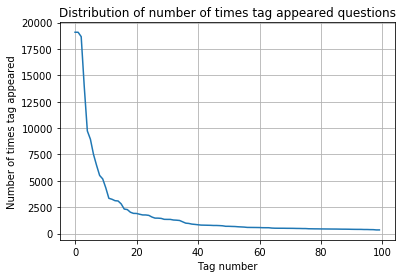

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_count)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [160]:
tag_quest_count = tag_dtm.sum(axis=1).tolist()
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 100000 datapoints.
[1, 2, 1, 2, 1]


In [161]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 8
Minimum number of tags per question: 1
Avg. number of tags per question: 2.024700


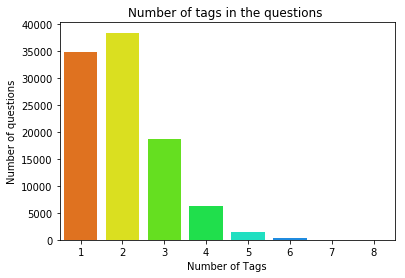

In [162]:
import seaborn as sns
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

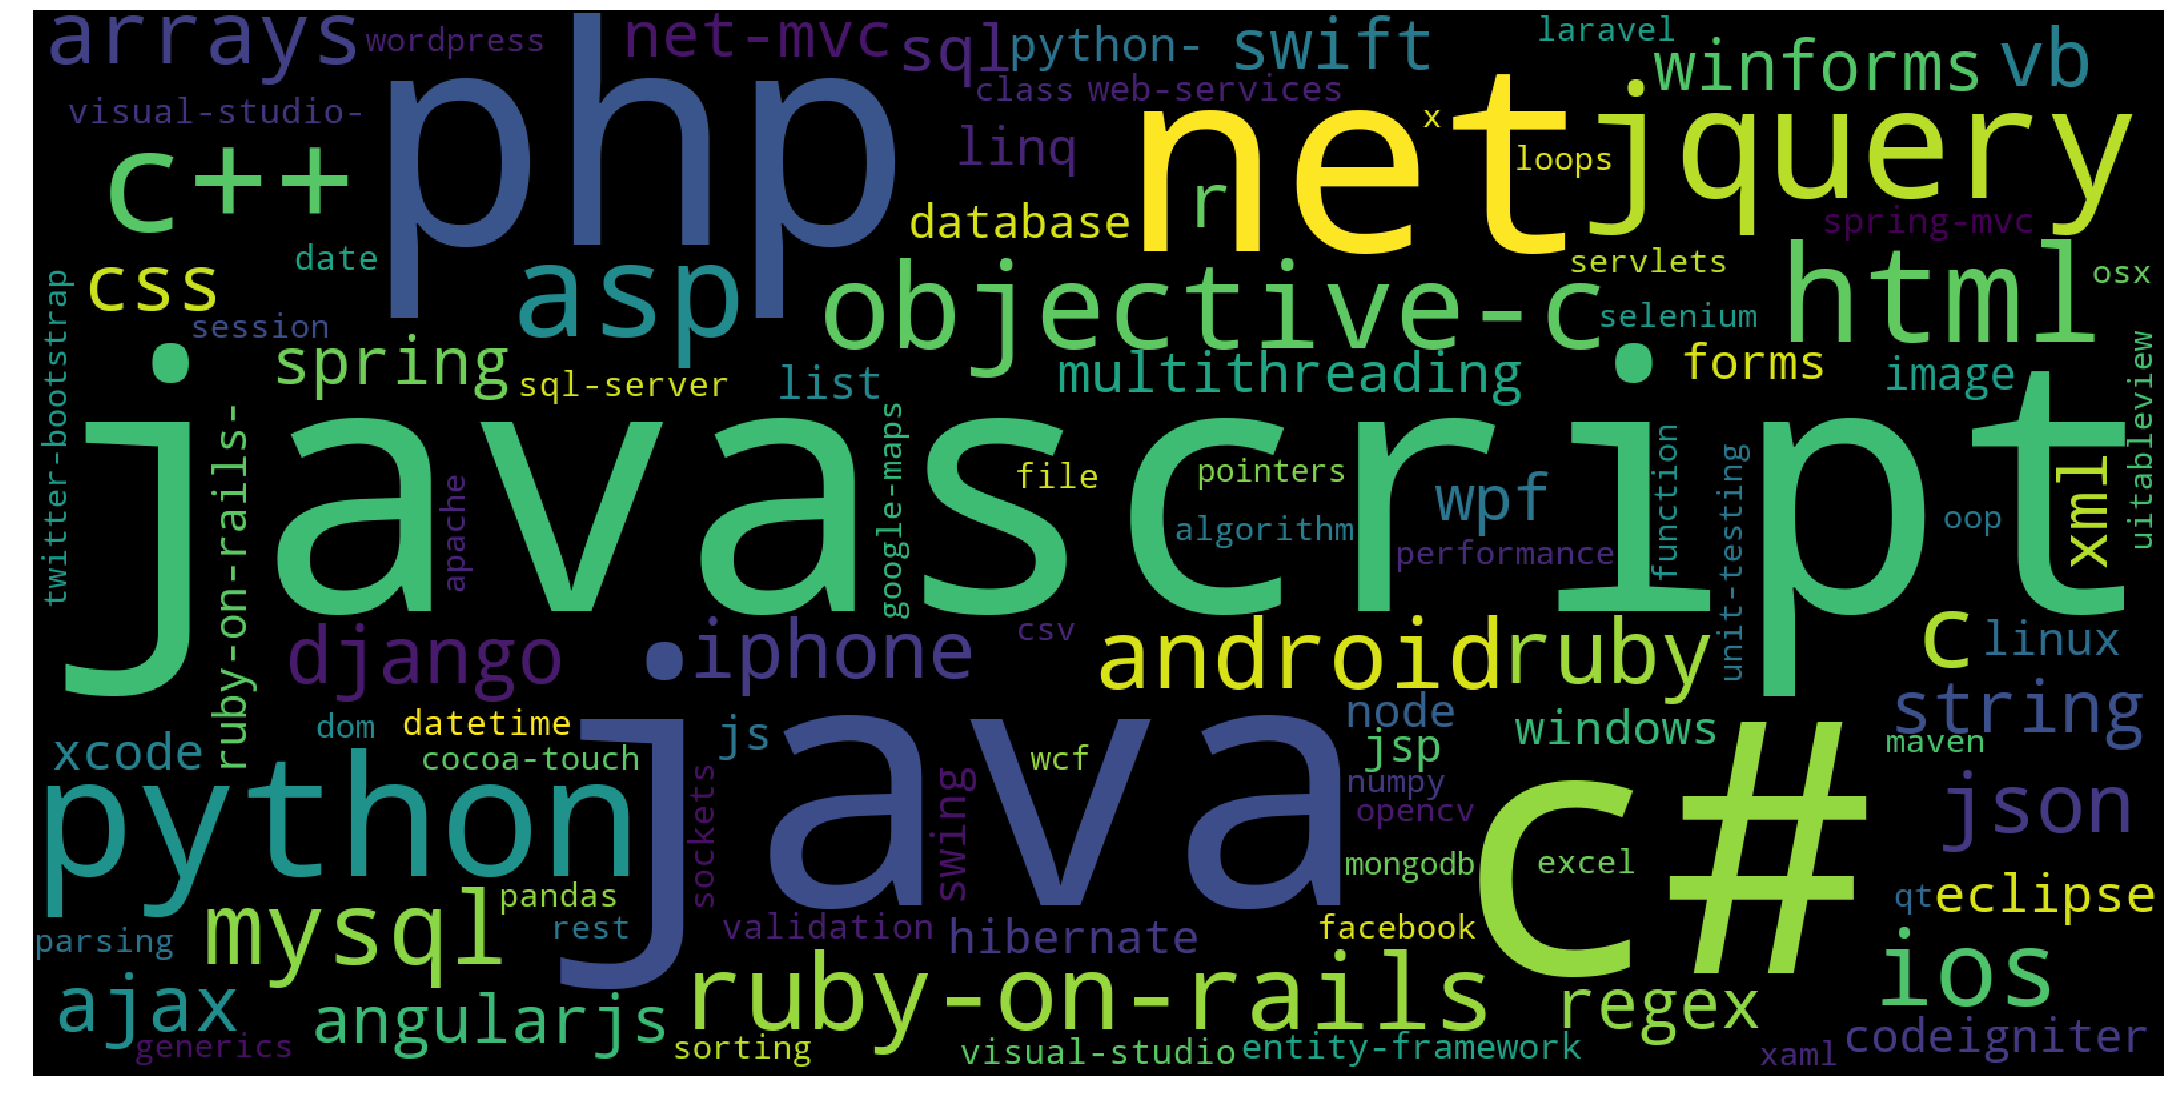

In [163]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
tup = dict(result.items())
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

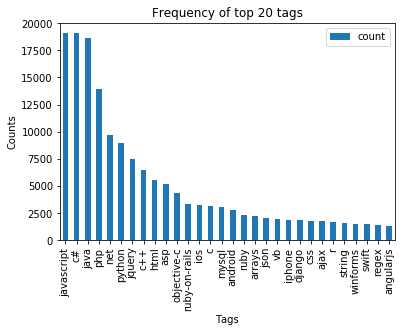

In [164]:
import numpy as np
i=np.arange(30)
df_tag_sort.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, df_tag_sort['tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

In [165]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(df['ctags'])

In [166]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [167]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=df.shape[0]
for i in range(1, total_tags):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

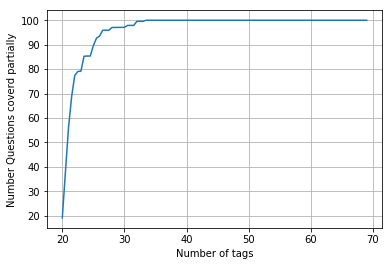

In [168]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(np.array(range(10,100,10)))
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
#print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [169]:
from sklearn.feature_extraction.text import TransformerMixin

In [170]:
d=pd.DataFrame()
d['text']=df.clean
d['tags']=df.ctags
d.to_csv('final',index=False)

In [10]:
df=pd.read_csv('final')
df.head()

,text,tags
0,b'draw stack dotplot r',r
1,b'mysql select record datetim field less speci...,php mysql
2,b'termin window phone app',c#
3,b'get current time specif countri via jqueri',javascript jquery
4,b'configur tomcat use ssl',java


### Splitting dataset

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.text, df.tags, test_size=0.2, random_state=9)

### Converting text and tags to vectors. you can use bow or tfidf for both too.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = tfvectorizer.fit_transform(x_train)
x_test_multilabel = tfvectorizer.transform(x_test)

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
y_train_multilabel = vectorizer.fit_transform(y_train)
y_test_multilabel = vectorizer.transform(y_test)


In [26]:
x_test_multilabel

<20000x9373 sparse matrix of type '<class 'numpy.float64'>'
	with 115860 stored elements in Compressed Sparse Row format>

### Training using One VS Rest.

In [27]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train_multilabel)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test_multilabel,predictions))
print("macro f1 score :",metrics.f1_score(y_test_multilabel, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test_multilabel, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test_multilabel,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test_multilabel, predictions))


accuracy : 0.33095
macro f1 score : 0.48967996608346887
micro f1 scoore : 0.6399664825274657
hamming loss : 0.011601
Precision recall report :
              precision    recall  f1-score   support

          0       0.78      0.47      0.59       327
          1       0.60      0.09      0.16        96
          2       0.92      0.52      0.67       555
          3       0.94      0.71      0.81       294
          4       0.70      0.19      0.30        83
          5       0.55      0.36      0.44       447
          6       0.86      0.41      0.55       950
          7       0.70      0.31      0.43       588
          8       0.83      0.61      0.70      3763
          9       0.89      0.46      0.61      1295
         10       0.28      0.05      0.09        96
         11       0.14      0.01      0.02       101
         12       0.97      0.75      0.85       140
         13       0.64      0.21      0.31       359
         14       0.74      0.66      0.70        87
       

In [28]:
import pickle
filename = 'model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [29]:
classifier = pickle.load(open('model.sav', 'rb'))

In [43]:
l=[b'  r c++ mysql select all records where a datetime']
p=pd.DataFrame()
p['test']=l
x=tfvectorizer.transform(l)


In [44]:
t=classifier.predict(x)
print(t)

  (0, 9)	1
  (0, 48)	1
  (0, 65)	1


### Converting back to word from vector.

In [45]:
k=vectorizer.inverse_transform(t)
k

[array(['c++', 'mysql', 'r'], dtype='<U17')]

In [46]:
print(k[0])
re.sub('[^A-Za-z#+-]+', ' ', str(k[0]))

['c++' 'mysql' 'r']


' c++ mysql r '